# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

## Learning objectives
- understand the DBSCAN algorithm
- implement the DBSCAN algorithm from scratch
- implement the DBSCAN algorithm in Sklearn

## Intro - The DBSCAN algorithm

DBSCAN is a non-parametric clustering technique. 
It does this by classifying points as 1 of 3 types: 
- core points - those with $\epsilon$ or more points within a radius of $d$ from it.  Core points are those with $\epsilon$ or more points within a radius of $d$ from it. 
- directly reachable points - those within a distance $d$ from a core point.
- noise points - those not within a distance $d$ from a core point.

In the image directly below, each example in our dataset is surrounded by a circle of radius $d$.
Red points are core points.
Yellow points are directly reachable points.
Blue points are noise points.

![](images/dbscan.png)

It can cluster arbitrarily shaped regions of datapoints, unlike K-means clustering. 

![](images/dbscan-clusters.png)

## Implementation from scratch

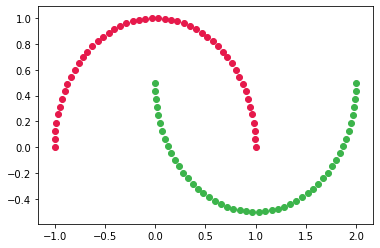

In [8]:
import numpy as np
np.set_printoptions(suppress=True)
from utils import get_classification_data, show_data, visualise_predictions, colors
import matplotlib.pyplot as plt
import sklearn.datasets
from time import sleep

X, Y = sklearn.datasets.make_moons()
# X, Y = get_classification_data()
show_data(X, Y)

distances: (100, 100)
[ 1  2  3  4  5  6  7  8  9  2  6  6  4  8  4 10 11  9  4  4  5  1  5 12
  6 13 12  7  1  9 11  7  3 13  9 10 11  6  6 13  9 11  6  9 13  9  9 11
 12 13 12  9 12 13 13  9  6  8  3 10 11  6 13 10  8  7 10 11  9 11  9  6
  9  6 13  9  8 12 12 13 11 12  9  9  6 11  9 13  8 13  8 11 11  9 13  8
  6 11  8  6]
distances: (100, 100)


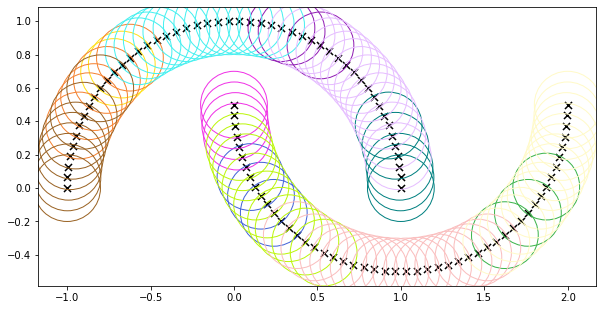

In [11]:

def compute_distances(input_X, dataset_X):
    """Takes in an array of inputs and finds each of their distances from every example in a dataset"""
    l = len(input_X)
    m = len(dataset_X)
    distances = np.zeros((l, m))
    for i in range(l):
        this_x = input_X[i]
        for j in range(m):
            another_x = dataset_X[j]
            distance = np.linalg.norm(this_x - another_x) # compute euclidian distance
            # print(distance)
            distances[i][j] = distance
    return distances

class DBSCAN:
    def __init__(self, X, epsilon=5, min_pts=3):
        self.X = X
        self.epsilon = epsilon # the radius of the neighbourhood of each core point
        self.min_pts = min_pts + 1 # because we dont want it to consider itself as a neighbour
        # self.dataset_predictions = self.predict(self.X, self.X)
    
    def classify_neighbours(self, x)

    def predict(self, X):
        # print(X)
        m = len(X)
        distances = compute_distances(X, self.X)
        within_radius = np.zeros_like(distances)
        within_radius[distances <= self.epsilon] = 1
        
        print('distances:', distances.shape)
        # print(within_radius)
        n_within_radius = np.sum(within_radius, axis=1)
        # print(n_within_radius)
        # core_points = n_within_radius >= self.min_pts
        core_pt_idxs = np.where(n_within_radius >= self.min_pts)[0]
        # print('core pts:', core_pt_idxs)
        non_core_pt_idxs = np.where(np.logical_and(n_within_radius > 1, n_within_radius < self.min_pts))[0]
        # print('non core pts:', non_core_pt_idxs)
        noise_pt_idxs = np.where(n_within_radius == 1)[0] # 1 because they will always be within their own neighbourhood
        # print('noise pts:', noise_pt_idxs)
        predictions = np.zeros(m)
        # print(predictions)
        cluster_idx = 0
        n_clusters_found = 0
        for idx in core_pt_idxs:
            in_radius_idxs = np.where(distances[idx] <= self.epsilon)[0]
            # print(len(in_radius_idxs))
            # sdfs
            # print(in_radius_idxs)
            # print('neighbour predictions:', predictions[in_radius_idxs])
            # print(predictions)
            if np.any(predictions[in_radius_idxs]):# if any neighbours are classified
                # print(predictions[in_radius_idxs])
                # print('classified neighbours')
                cluster_idx = np.max(predictions[in_radius_idxs]) # get the classification arbitrarily breaking ties
                predictions[idx] = cluster_idx # classify this point with the same type
            else: # else
                # print('no classified neightbours')
                new_cluster_idx = n_clusters_found + 1 # increment the number of clusters found
                predictions[idx] = new_cluster_idx # classify this point as a member of a new cluster
                n_clusters_found += 1
        return predictions.astype(int)

    def predict_vis(self, X):
        self.predict()

    def visualise(self, predictions):
        plt.ion()
        plt.show()
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')

        for cluster_idx in list(set(predictions)):
            # print(cluster_idx)
            cluster_datapoints = X[predictions == cluster_idx]
            ax.scatter(cluster_datapoints[:, 0], cluster_datapoints[:, 1], s=50, marker='x', c='k')
            for x in cluster_datapoints:
                circle = plt.Circle((x[0], x[1]), self.epsilon, color=colors[cluster_idx], fill=False)
                ax.add_artist(circle)
                # fig.canvas.draw()
                # sleep(0.1)
        # plt.scatter(X[:, 0], X[:, 1], s=500, marker='o', c='r')
        plt.show()

dbscan = DBSCAN(X, epsilon=0.2, min_pts=2)
cluster_predictions = dbscan.predict(X)
print(cluster_predictions)
dbscan.visualise(dbscan.predict(X))
# print('beginning visualisation')
# visualise_predictions(dbscan.predict, X, Y)

Limitations of DBSCAN
- We need to compute the distance between each point and each other point
- 